In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [16]:
data = pd.read_csv("mobile_data.csv")

print("\n----- HEAD -----")
print(data.head())

print("\n----- INFO -----")
print(data.info())

print("\n----- DESCRIPTION -----")
print(data.describe())

print("\n----- SHAPE -----")
print(data.shape)


----- HEAD -----
             Brand  Ratings  RAM  ROM  Mobile_Size  Primary_Cam  Selfi_Cam  \
0      Samsung A12      4.2    4   64         6.50           48          8   
1     Redmi Note 9      4.3    4  128         6.53           48         13   
2         OPPO A54      4.1    6  128         6.51           13         16   
3         Vivo Y20      4.0    4   64         6.51           13          8   
4  Realme Narzo 30      4.4    6  128         6.50           48         16   

   Battery_Power  Price  
0           5000  11999  
1           5020  12999  
2           5000  14999  
3           5000  12990  
4           5000  15499  

----- INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          10 non-null     object 
 1   Ratings        10 non-null     float64
 2   RAM            10 non-null     int64  
 3   ROM          

In [17]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [18]:
numeric_features = ['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power']
categorical_features = ['Brand']

In [19]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("\n===== LINEAR REGRESSION RESULTS =====")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("R2 Score:", lr_r2)


===== LINEAR REGRESSION RESULTS =====
MAE: 490.11241581168815
MSE: 256375.32720983686
R2 Score: 0.8860554101289614


In [22]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\n===== RANDOM FOREST RESULTS =====")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)


===== RANDOM FOREST RESULTS =====
MAE: 1927.75
MSE: 4240540.8725000005
R2 Score: -0.8846848322222225


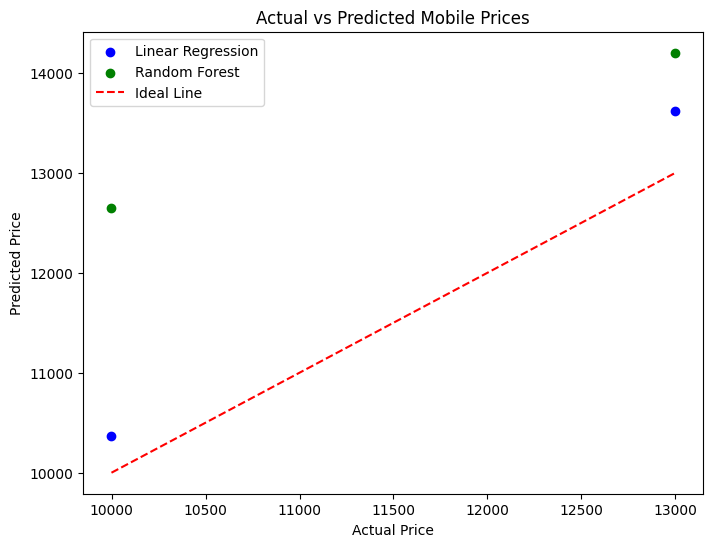

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, lr_pred, label="Linear Regression", color="blue")
plt.scatter(y_test, rf_pred, label="Random Forest", color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color="red", linestyle="--", label="Ideal Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Mobile Prices")
plt.legend()
plt.show()

In [24]:
def predict_new_mobile(brand, ratings, ram, rom, size, primary, selfie, battery):
    new_data = pd.DataFrame([{
        "Brand": brand,
        "Ratings": ratings,
        "RAM": ram,
        "ROM": rom,
        "Mobile_Size": size,
        "Primary_Cam": primary,
        "Selfi_Cam": selfie,
        "Battery_Power": battery
    }])
    return rf_model.predict(new_data)[0]

# Example Prediction
example_price = predict_new_mobile("Samsung A12", 4.4, 6, 128, 6.5, 48, 16, 5000)
print("\nPredicted Price for Example Mobile:", example_price)



Predicted Price for Example Mobile: 15332.92
